## what is Bitcoin

Bitcoin is a cryptocurrency that was created in january 2009. it is the world's most valuable cryptocurrency and is trande on over 40 exchanged around the world, accepting over 30 different currencies. As a currency, Bitcoin offers a new opportunity for price forecasting as it has high volatility, which is much higher compared to traditional currencies<br>
<br>
The bitcoin system is set of decentralized nodes that run bitcoin code and store its blockchain.Metaphorically a blockchain can be considered a collection of blocks in each block there is a collection of transaction. Because all the computers running the blockchain has tha same list of blocks and teansactions, and can transparently see these new block being filled with new bitcoin transactions no one can cheat the system<br>
<br>
Bitcoin uses peer-to-peer technology to facilitate instant payments.Miners are responsible for processing transactions on the blockchain and are driven by repo fees<br>
<br>
The way bitcoin work are key to understanding why it is so popular. unlike other investment, cryptocurrency is not tied to physical assets or the US dollar it primary purpose is to allow two people anywhere to excahange value directly. what this means is that there is no ceterlized controlling this network. There is no 


In [1]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,LSTM
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from sklearn.metrics import mean_absolute_errorimport se as sns
from sklearn.preprocessing import MinMaxScaler


SyntaxError: invalid syntax (<ipython-input-1-cf6e3643c511>, line 9)

## Getting real Time Cryptocurrency

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=1600')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
# dependent variable
target_col = 'close'

**to_datetime()** method to convert string Data time into Python data Time Object.This is Necessary as Date time objects in the file are read as a string object.Performing operation like time Difference on a string rather a Data Time object is much easy

In [3]:
hist.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2017-04-14,1602.00,1555.51,1576.75,290.19,458549.04,1556.22,direct,
2017-04-15,1589.98,1555.00,1556.22,147.81,233499.17,1588.99,direct,
2017-04-16,1589.99,1559.00,1588.99,249.72,393138.79,1579.52,direct,
2017-04-17,1619.99,1559.99,1579.52,275.75,440720.31,1602.00,direct,
2017-04-18,1629.97,1575.00,1602.00,493.52,791768.10,1619.83,direct,


**note:** Here we no need ConversionType and ConversionSymbol columns so we droup this columns into our DataFram

In [4]:
hist.drop(['conversionType','conversionSymbol'],axis=1,inplace=True)

## About the Bitcoin Data
Included here is historical bitcoin market data at 1 day intervals for selection bitcoin exchanges where tranding take place it consists time period of 05-12-2018 to 31-08-2021 with day to day update<br>
<br>
- The **open and close** columns indicate the opening and closing price on a particular day
- The **High and low** columns provide the High and Low Columns provide the Highest and the Lowest price on a particular day respectively
- Volumn is the sum total of actual trandes taking place, meanwhile liquidity is the amount available for tranding at any sigle price.



In [5]:
hist['Diff_Volumne']= hist['volumeto']- hist['volumefrom']

<AxesSubplot:>

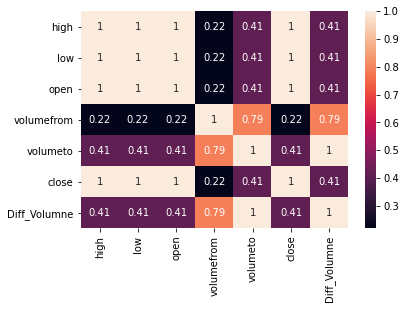

In [6]:
sns.heatmap(hist.corr(),annot=True)

In [7]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(hist, test_size=0.2)

In [8]:
train.head()

,high,low,open,volumefrom,volumeto,close,Diff_Volumne
time,,,,,,,
2017-04-14,1602.00,1555.51,1576.75,290.19,458549.04,1556.22,458258.85
2017-04-15,1589.98,1555.00,1556.22,147.81,233499.17,1588.99,233351.36
2017-04-16,1589.99,1559.00,1588.99,249.72,393138.79,1579.52,392889.07
2017-04-17,1619.99,1559.99,1579.52,275.75,440720.31,1602.00,440444.56
2017-04-18,1629.97,1575.00,1602.00,493.52,791768.10,1619.83,791274.58


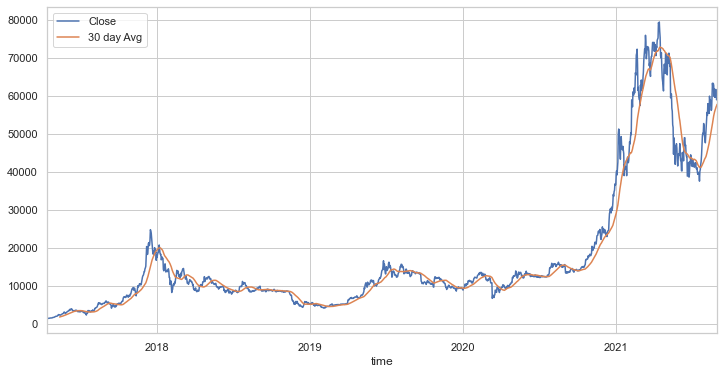

In [9]:
sns.set()
sns.set_style('whitegrid')
hist[target_col].plot(figsize=(12,6),label='Close')
hist[target_col].rolling(window=30).mean().plot(label='30 day Avg')
plt.legend()

Pandas **dataframe.rolling()** funcation provides the feature of rolling window calculations.The concept of rolling window calculation is most primarily used in sigle processing and time series data.In a very simple words we take a windoe size of k ar a time and perform some desired mathematical operation on it. In our program we set the window 30 value and mean as mathematical opration. every set of 30 value we will take the mean value anf ploting the graph<br>
<br>
I will be using it to predict the behaviour of bitcoin a month into the future. 

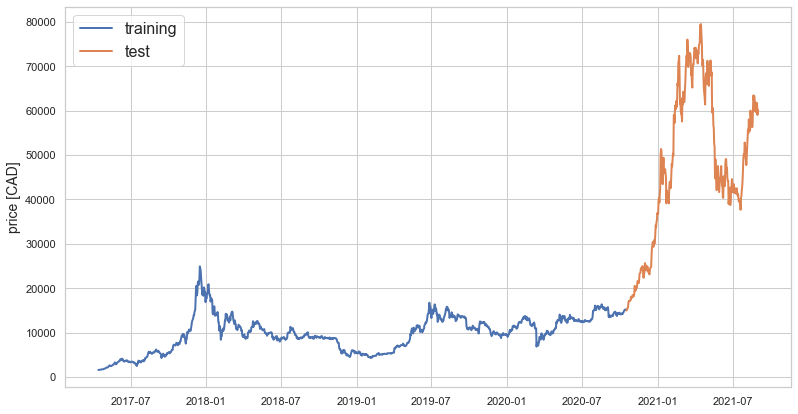

In [10]:
def line_plot(line1,line2, label1 = None, label2= None, title='',lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

**We can observe that there is a clear dip in prices between December 2018 and April 2019. The prices keep on increasing from April 2019 to August 2019 with fluctuations happening in the months of July and August. From September 2019 onward prices are constantly decreasing. The interesting thing to be noted from this price fluctuation is that the prices are low in winter and it increases in the summer. Although this can’t be generalized as the dataset under consideration is just a small sample that is for a year.**


## Check out there is any missing value is presernt ?
 

In [11]:
hist.isnull().sum()

high            0
low             0
open            0
volumefrom      0
volumeto        0
close           0
Diff_Volumne    0
dtype: int64

In [12]:

def normalise_zero_base(df):
    return df/df.iloc[0]-1

def normalise_min_max(df):
    return ((df -df.min())/(df.max()-df.min()))

In [13]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [14]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

## Technology used
### Recurrent Neural Networks
RNNs are a robust and powerful type of neural network and are considered one of the most professional algorithms because they are the only ones with internal memory.<br>
<br>
The algorithm performs very well for sequential data such as time series, speech, text, financial data, audio, video, weather, and more. RNNs are able to form a much deeper understanding of a sequence and its context compared to other algorithms.<br>
<br>

### Long Short-Term Memory (LSTM)

Long short-term memory networks are an extension of recurrent neural networks, which basically extend the memory. Therefore it is well suited to learn from important experiences that have very long time lags in between.<br>
<br>

LSTMs enable RNNs to remember inputs over a long period of time. This is because LSTMs contain information in a memory, much like the memory of a computer. The LSTM can read, write and delete information from its memory.



In [15]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [16]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [17]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
40/40 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 8/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 10/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 11/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 12/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 13/20
40/40 [==============================

In [18]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.03444643716493834

## Prdicting the Price

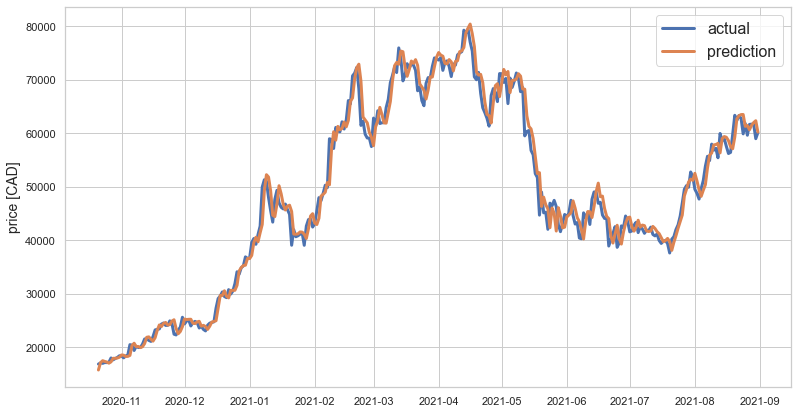

In [19]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)


In [23]:
hist.drop('Diff_Volumne',axis=1,inplace=True)

In [24]:
hist.to_csv('Bitcoin.csv')

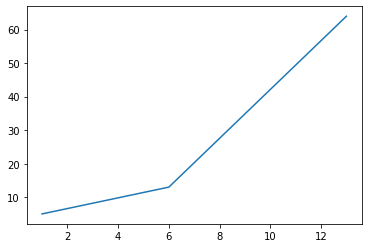

In [3]:
import matplotlib.pyplot as plt
X = [1,6,13]
y = [5,13,64]
plt.plot(X,y)

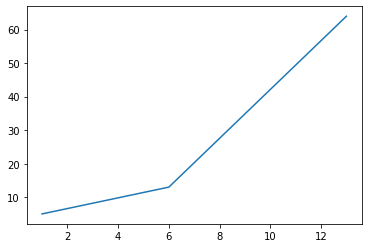

In [5]:
%matplotlib inline
plt.plot(X,y)